In [1]:
%matplotlib inline
import numpy as np
from pylab import *
from tqdm import trange 


In [2]:
# fetch mnist dataset 
import requests, gzip, os, hashlib

def fetch(url):
    fp = os.path.join("/tmp", hashlib.md5(url.encode('utf-8')).hexdigest())
    if os.path.isfile(fp):
        with open(fp, "rb") as handler:
            data = handler.read()
    else:
        with open(fp, "wb") as handler:
            data = requests.get(url).content
            handler.write(data)
        
    return np.frombuffer(gzip.decompress(data), dtype=np.uint8).copy()

X_train = fetch("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_train = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")[8:]
X_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz")[8:]

    

# specs
https://github.com/geohot/ai-notebooks/blob/master/mnist_from_scratch.ipynb
https://victorzhou.com/blog/intro-to-neural-networks/


In [3]:
X_train.shape

(60000, 28, 28)

(<matplotlib.image.AxesImage at 0x1129951f0>, 5)

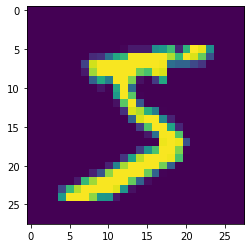

In [4]:
imshow(X_train[0]),Y_train[0]

In [2]:
def sigmoid(x, derivative=False):
    if derivative:
        return (np.exp(-x))/((np.exp(-x)+1)**2)
    return 1 / (1+np.exp(-x))


def softmax(x):
    exps = np.exp(x-x.max())
    return exps / np.sum(exps, axis=0)


def relu(x):
    return np.maximum(0,x)


def layer(input_size, output_size):
    # bias = np.random.uniform(size=(input_size, output_size))
    weights = np.random.uniform(-1.,1.,size=(input_size, output_size)/np.sqrt(input_size*output_size))

    return weights.astype(np.float32) #, bias


l1 = layer(784,128)
l2 = layer(128,10)


NameError: name 'np' is not defined

In [6]:
BS = 128
samp = np.random.randint(0, X_train.shape[0], size=(BS))

In [11]:
# understanding gradients
# https://cs231n.github.io/optimization-2/
# partial derrivative / gradient = rate of change at f(x,y)
# chain rule = multiplication of components holding the gradients e.g. df/dx = df/dq * dq/dx

# compute gradients for each value where f(x,y,z) = (x+y)*z
x = 7
y = -2
z = 4

q = x+y
f = q * z

# backprop through f first. partial derrivative of z = q and dq = z
dfdz = q # incremental rate of change in multiplication is the value of the other component
dfdq = z
dqdx = 1 # incremental rate of change in sum is always 1
dqdy = 1

# backprop through q 
dfdx = dfdq * dqdx # apply chain rule by multiplying
dfdy = dfdq * dqdy 

print(f'dfdx: {dfdx} \ndfdy: {dfdy} \ndfdz: {dfdz}') # these gradients = sensitivity of each value on f

dfdx: 4 
dfdy: 4 
dfdz: 5


In [8]:
def forward_backward(x, y):
    # get true labels as an array for each image 
    y_true = np.zeros((len(y),10), np.float32)
    y_true[range(y_true.shape[0]), y] = 1  

    # foward pass
    x_l1 = x.dot(l1) # dot product = sum of vectors into a scalar
    # x_sigm = sigmoid(x_l1)
    x_relu = relu(x_l1) # relu wins 
    x_l2 = x_relu.dot(l2)
    out = softmax(x_l2)

    # MSE 
    loss = np.square(y_true-out)/2

    # backprop - compute gradients in reverse order 
    d_out = - y_true / len(y)

    # derrivative of softmax 
    d_sm = 
    

    # derrivative of sigmoid 
    dx_sigm = x_sigm * (1-x_sigm)

    # d of l2
    dx_l2 = 
    
    # log softtmax derrivative
    dx_lsm = d_out - np.exp(x_l2) * d_out.sum(axis=1).reshape((-1,1))
    
    # derrivate of l2
    d_l2 = x_sigm.T.dot(dx_lsm)
    dx_sigm = dx_lsm.dot(l2.T)

    # derrivate of sigm
    dx_l1 = dx_sigm * (1 - dx_sigm)

    # derrivate of l1
    d_l1 = x.T.dot(dx_l1)

    return loss, x_l2, d_l1, d_l2

SyntaxError: invalid syntax (591413850.py, line 24)

In [1]:
# TODO implement SGD
lr = 0.001
batch_size = 128

# training loop 
# for epoch in trange(1000):
    

In [32]:
# def forward(x):
#     x = x.dot(l1)
#     x = sigmoid(x)
#     x = x.dot(l2)
#     return x 

# def eval():
#     y_preds_out = forward(X_test.reshape((-1,28*28)))
#     y_preds = np.argmax(y_preds_out, axis=1)
#     return (Y_test == y_preds).mean()

# eval()

0.0958